PROJECT ONE

<h1>QUESTION 1</h1>



In [14]:
#Importing modules
import matplotlib.pyplot as plt
import pandas as pd


Preparing Data

In [6]:
#reading the data
df = pd.read_csv('UnemploymentRateData.csv')

display(df)

,Date,Unemployment Rate
0,1980-01-01,6.3
1,1980-02-01,6.3
2,1980-03-01,6.3
3,1980-04-01,6.9
4,1980-05-01,7.5
...,...,...
477,2019-10-01,3.6
478,2019-11-01,3.5
479,2019-12-01,3.5
480,2020-01-01,3.6


In [7]:
#converting dates from strings
df.info()
import matplotlib.dates as mdates

xVals = df["Date"]
yVals = df["Unemployment Rate"]

xValsConverted = pd.to_datetime(xVals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
Date                 482 non-null object
Unemployment Rate    482 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


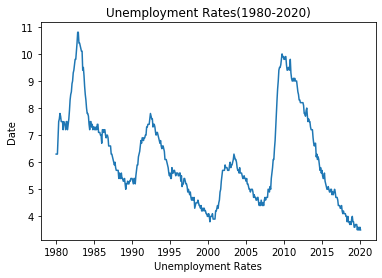

In [16]:
#plotting the figure

fig, ax = plt.subplots() 

ax.plot(xValsConverted,yVals)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %I%p'))
ax.set_title('Unemployment Rates(1980-2020)')
ax.set_xlabel('Unemployment Rates')
ax.set_ylabel('Date')

#saving
plt.savefig('UnemploymentRate.pdf')


<h2>QUESTION TWO</h2>

In [78]:
#Importing modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

Question 2a 

In [79]:

#reading the grade data
gradeDat=pd.read_csv('gradeData.csv')
display(gradeDat)

,ID,CRSENUM,Grade
0,34555641,1,B+
1,34555641,2,C-
2,34555641,3,C+
3,34555641,4,B-
4,89388941,1,B+
...,...,...,...
6368,69894109,4,C+
6369,42132950,1,B+
6370,42132950,2,A-
6371,42132950,3,B-


In [60]:
def gradeToPoints(theLetterGrade):
        
    
        if(theLetterGrade=="A"):
            points=4.0
        elif(theLetterGrade=="A+"):
            points=4.0
        elif(theLetterGrade=="A-"):
            points=3.7
        elif(theLetterGrade=="B+"):
            points=3.3
        elif(theLetterGrade=="B"):
            points=3.0
        elif(theLetterGrade=="B-"):
            points=2.7
        elif(theLetterGrade=="C+"):
            points=2.3
        elif(theLetterGrade=="C"):
            points=2.0
        elif(theLetterGrade=="C-"):
            points=1.7
        elif(theLetterGrade=="D+"):
            points=1.3
        elif(theLetterGrade=="D"):
            points=1.0
        elif(theLetterGrade=="D-"):
            points=0.7
        elif(theLetterGrade=="F"):
            points=0.0
            
        return points
 # adding a new colum with semester gpa
gradeDat['SemGPA']=gradeDat['Grade'].apply(gradeToPoints)
display(gradeDat)                    

# Calculating semster Gpa
dfSemGPA= gradeDat[['ID','SemGPA']].groupby(['ID']).mean()
dfSemGPA.reset_index(inplace=True)
display(dfSemGPA)

#SAVING
dfSemGPA.to_csv('SemGPAData.csv',index=False)

,ID,CRSENUM,Grade,SemGPA
0,34555641,1,B+,3.3
1,34555641,2,C-,1.7
2,34555641,3,C+,2.3
3,34555641,4,B-,2.7
4,89388941,1,B+,3.3
...,...,...,...,...
6368,69894109,4,C+,2.3
6369,42132950,1,B+,3.3
6370,42132950,2,A-,3.7
6371,42132950,3,B-,2.7


,ID,SemGPA
0,11000716,2.340
1,11070272,3.425
2,11087006,3.740
3,11122625,3.350
4,11137048,3.675
...,...,...
1493,99710742,2.825
1494,99711662,3.000
1495,99739029,1.425
1496,99846319,2.540


Question 2b




In [61]:
#get the summary of GPA Data
dfSemGPA['SemGPA'].describe()


count    1498.000000
mean        2.848168
std         0.645834
min         0.925000
25%         2.400000
50%         2.900000
75%         3.400000
max         4.000000
Name: SemGPA, dtype: float64

Question #2c

In [62]:
#get a table with grade frequency
gradeDat['Grade'].value_counts().to_frame()

,Grade
B-,929
B,880
B+,864
A,789
C+,788
A-,678
C,492
C-,373
D+,193
A+,174


Question # 2d

In [68]:
#reading the student data
studentDat = pd.read_csv('studentInfo.csv')
display(studentDat)

# merge with sem GPA
studentNew= pd.merge(studentDat, dfSemGPA,how="left", on="ID")
display(studentNew)

#saving
studentNew.to_csv('dfStudentUpdated.csv',index=False)

,ID,First Name,Last Name,Sex,HSGPA,Year,Major,GPA Units,GPA,Total Units
0,34555641,Malachi,Graham,M,2.98,FY,E,0,0.00,5
1,89388941,Asher,Ayers,M,3.45,JR,A,14,3.41,16
2,12795232,Riley,Joseph,M,2.96,FY,C,0,0.00,5
3,48375892,Alex,Trejo,M,3.31,FY,A,0,0.00,4
4,98317384,Lilah,Simmons,F,3.85,JR,A,12,3.56,15
...,...,...,...,...,...,...,...,...,...,...
1674,35196902,Mariana,Mullen,F,3.89,SO,B,5,1.83,9
1675,58909170,Riley,Potter,F,2.91,SR,B,21,2.48,26
1676,69894109,Lyla,Calhoun,F,2.75,SO,D,5,3.71,9
1677,42132950,Briella,Tapia,F,3.19,SO,C,4,2.79,9


,ID,First Name,Last Name,Sex,HSGPA,Year,Major,GPA Units,GPA,Total Units,SemGPA
0,34555641,Malachi,Graham,M,2.98,FY,E,0,0.00,5,2.500
1,89388941,Asher,Ayers,M,3.45,JR,A,14,3.41,16,3.425
2,12795232,Riley,Joseph,M,2.96,FY,C,0,0.00,5,2.925
3,48375892,Alex,Trejo,M,3.31,FY,A,0,0.00,4,3.825
4,98317384,Lilah,Simmons,F,3.85,JR,A,12,3.56,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1674,35196902,Mariana,Mullen,F,3.89,SO,B,5,1.83,9,1.880
1675,58909170,Riley,Potter,F,2.91,SR,B,21,2.48,26,2.050
1676,69894109,Lyla,Calhoun,F,2.75,SO,D,5,3.71,9,3.075
1677,42132950,Briella,Tapia,F,3.19,SO,C,4,2.79,9,3.350


Question #2e

In [72]:
below2GPA=studentNew[studentNew['SemGPA']<= 2.0]

#save
below2GPA.to_csv('below2GPA.CSV',index= False)

Question #2f

In [ ]:
#set style
sns.set(style='ticks')
sns.set_palette('bright')

In [ ]:
#graph 1
sns.relplot(x='HSGPA',y='SemGPA',kind='scatter',data=studentNew)
plt.savefig('Graph1.pdf')

In [ ]:
#graph 2
sns.relplot(x='HSGPA',y='SemGPA',hue='Sex',kind='scatter',data=studentNew)
plt.savefig('Graph2.pdf')

In [ ]:
#graph 3
sns.catplot(x='Year',Y='SemGPA',hue='Major',kind='strip',data=studentNew)
plt.savefig('Graph3.pdf')

In [ ]:
#graph 4
sns.catplot(x='Year',Y='SemGPA',hue='Sex',kind='violin',data=studentNew)
plt.savefig('Graph4.pdf')

In [ ]:
#graph 5
sns.distplot(studentNew['SemGPA'], hist=False)
plt.savefig('Graph5.pdf')

In [ ]:
#graph 6
sns.regplot(x='GPA',Y='SemGPA',marker='.',data=studentNew[studentNew['year']!='FY'])
plt.savefig('Graph6.pdf')

In [ ]:
#graph 7
notFY=studentNew[studentNew['year']!='FY']
sns.pairplot(notFY[['HSGPA','GPA','Sex','SemGPA']],hue='Sex')
plt.savefig('Graph7.pdf')

Question #2g

In [75]:
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#regression one
fitModel= smf.ols(formula='SemGPA'~'HSGPA', data= studentNew)
theResults=fitModel.fit()
print(theResults.summary())


In [ ]:
#regression two
fitModel= smf.ols(formula='SemGPA~HSGPA + C(Sex)', data= studentNew)
theResults=fitModel.fit()
print(theResults.summary())

In [ ]:
#regression three 
fitModel= smf.ols(formula='SemGPA~ GPA + C(Sex)+ C(Major)+ C(Year)', data=studentNew[studentNew['year']!='FY'])
theResults=fitModel.fit()
print(theResults.summary())

In [ ]:
#regression four 
#regression three 
fitModel= smf.ols(formula='SemGPA~ HSGPA + C(Sex)+C(Major)', data=studentNew[studentNew['year']=='FY'])
theResults=fitModel.fit()
print(theResults.summary())

<h3> QUESTION THREE </h2>

Question #3a

In [115]:
#read data
df = pd.read_csv('names\yob1880.txt',names=['Name','Sex','NumOfBirths'])
df['Year']=1880
# reading data for all years
for year in range(1881,2019):
    newdf=pd.read_csv('names\yob'+ str(year) +'.txt',names =['Name','Sex','NumOfBirths'])
    newdf['Year']= year
    df=pd.concat([df,newdf],ignore_index=True)
#new data
display(df)

df.to_csv('fullNamesDat.csv',index=False)

,Name,Sex,NumOfBirths,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


Question #3b

In [116]:
# data in 2018 and most popular names 
dfNewDat= df[df['Year'] == 2018]
display(dfNewDat)
display(dfNewDat.nlargest(5,'NumOfBirths'))

,Name,Sex,NumOfBirths,Year
1925013,Emma,F,18688,2018
1925014,Olivia,F,17921,2018
1925015,Ava,F,14924,2018
1925016,Isabella,F,14464,2018
1925017,Sophia,F,13928,2018
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


,Name,Sex,NumOfBirths,Year
1943042,Liam,M,19837,2018
1925013,Emma,F,18688,2018
1943043,Noah,M,18267,2018
1925014,Olivia,F,17921,2018
1925015,Ava,F,14924,2018


In [117]:
# most popular female names 
dfNewDat= df[(df['Year'] == 2018) & (df['Sex']=='F')]
display(dfNewDat.nlargest(5,'NumOfBirths'))

,Name,Sex,NumOfBirths,Year
1925013,Emma,F,18688,2018
1925014,Olivia,F,17921,2018
1925015,Ava,F,14924,2018
1925016,Isabella,F,14464,2018
1925017,Sophia,F,13928,2018


In [118]:
# most popular male names 
dfNewDat= df[(df['Year'] == 2018) & (df['Sex']=='M')]
display(dfNewDat.nlargest(5,'NumOfBirths'))

,Name,Sex,NumOfBirths,Year
1943042,Liam,M,19837,2018
1943043,Noah,M,18267,2018
1943044,William,M,14516,2018
1943045,James,M,13525,2018
1943046,Oliver,M,13389,2018


Question #3c

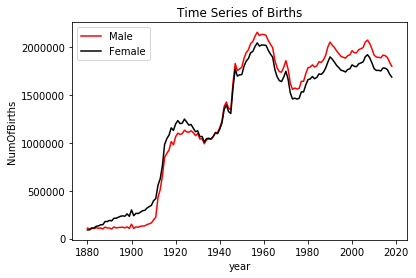

In [125]:
#find the numbe rof Births by sex and year
dfTtl= df[['Sex','NumOfBirths','Year']].groupby(['Sex','Year']).sum()
dfTtl.reset_index(inplace= True)
# data for males and females separately
dfMales= dfTtl[dfTtl['Sex']=='M']
dfFemales= dfTtl[dfTtl['Sex']=='F']

#figure
fig, ax= plt.subplots()
ax.plot(dfMales['Year'],dfMales['NumOfBirths'],c='r')
ax.plot(dfFemales['Year'],dfFemales['NumOfBirths'],c='k')
#set titles
ax.set_title('Time Series of Births')
ax.set_xlabel('Year')
ax.set_xlabel('year')
ax.set_ylabel('NumOfBirths')
ax.legend(['Male','Female'])

Question 3d

Text(0, 0.5, 'NumOfBirths')

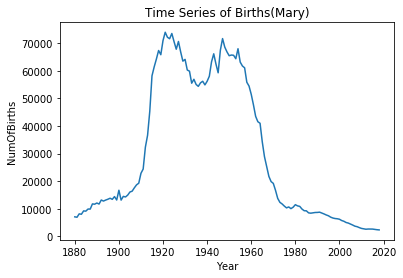

In [128]:
dfSub= df[(df['Name']=='Mary')&(df['Sex']=='F')]
fig, ax= plt.subplots()
ax.plot(dfSub['Year'],dfSub['NumOfBirths'])
#set titles
ax.set_title('Time Series of Births(Mary)')
ax.set_xlabel('Year')

ax.set_ylabel('NumOfBirths')



Text(0, 0.5, 'NumOfBirths')

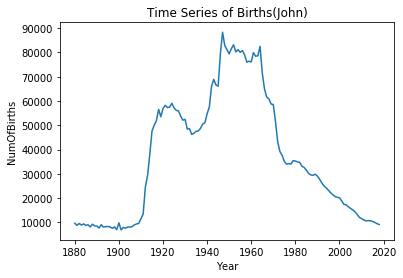

In [130]:
dfSub= df[(df['Name']=='John')&(df['Sex']=='M')]
fig, ax= plt.subplots()
ax.plot(dfSub['Year'],dfSub['NumOfBirths'])
#set titles
ax.set_title('Time Series of Births(John)')
ax.set_xlabel('Year')

ax.set_ylabel('NumOfBirths')

Text(0, 0.5, 'NumOfBirths')

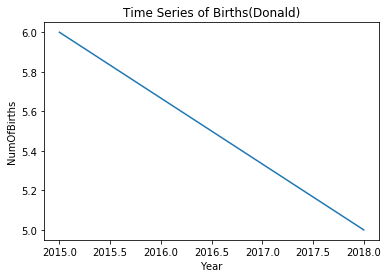

In [146]:
dfSub= df[(df['Name']=='North')&(df['Sex']=='F')]
fig, ax= plt.subplots()
ax.plot(dfSub['Year'],dfSub['NumOfBirths'])
#set titles
ax.set_title('Time Series of Births(Donald)')
ax.set_xlabel('Year')

ax.set_ylabel('NumOfBirths')